In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [2]:
dataset_data = pd.read_csv('../data/dataset.csv')
dataset_data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset_data.fillna(value='missing', inplace=True)
dataset_data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,Fungal infection,itching,skin_rash,dischromic _patches,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing


In [4]:
y = dataset_data.drop('Disease', axis=1)
encoder = MultiLabelBinarizer()
encoder.fit_transform(y)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [5]:
encoder.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'S', '_', 'm',
       'o', 'p', 't', 'y'], dtype=object)

In [6]:
pd.get_dummies(y)

,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,...,Symptom_15_ blood_in_sputum,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_15_missing,Symptom_16_ blood_in_sputum,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_16_missing,Symptom_17_ muscle_pain,Symptom_17_missing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4917,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [7]:
y.value_counts()

Symptom_1         Symptom_2                     Symptom_3                      Symptom_4             Symptom_5              Symptom_6            Symptom_7      Symptom_8             Symptom_9  Symptom_10  Symptom_11  Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17
 constipation      pain_during_bowel_movements   pain_in_anal_region            bloody_stool          irritation_in_anus    missing              missing        missing               missing    missing     missing     missing     missing     missing     missing     missing     missing       90
 muscle_weakness   stiff_neck                    swelling_joints                movement_stiffness    painful_walking       missing              missing        missing               missing    missing     missing     missing     missing     missing     missing     missing     missing       90
 joint_pain        neck_pain                     knee_pain                      hip_joint_pain        swelling_joints       

In [8]:
symptoms = []

for col in dataset_data.columns[1:]:
    symptoms.append(dataset_data[col].unique())

symptoms

[array(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
        ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
        ' muscle_wasting', ' patches_in_throat', ' fatigue',
        ' weight_loss', ' sunken_eyes', ' cough', ' headache',
        ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills',
        ' joint_pain', ' yellowish_skin', ' constipation',
        ' pain_during_bowel_movements', ' breathlessness', ' cramps',
        ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness',
        ' stiff_neck', ' pus_filled_pimples', ' burning_micturition',
        ' bladder_discomfort', ' high_fever'], dtype=object),
 array([' skin_rash', ' nodal_skin_eruptions', ' shivering', ' chills',
        ' acidity', ' ulcers_on_tongue', ' vomiting', ' yellowish_skin',
        ' stomach_pain', ' loss_of_appetite', ' indigestion',
        ' patches_in_throat', ' high_fever', ' weight_loss',
        ' restlessness', ' sunken_eyes', ' dehydration', ' cough',

In [9]:
unique_symp = []

for row in symptoms:
    for symp in row:
        if (symp not in unique_symp) and (symp is not np.nan):
            unique_symp.append(symp.strip())
        else:
            print('existing', end="\r")

In [10]:
unique_symp

['itching',
 'skin_rash',
 'continuous_sneezing',
 'shivering',
 'stomach_pain',
 'acidity',
 'vomiting',
 'indigestion',
 'muscle_wasting',
 'patches_in_throat',
 'fatigue',
 'weight_loss',
 'sunken_eyes',
 'cough',
 'headache',
 'chest_pain',
 'back_pain',
 'weakness_in_limbs',
 'chills',
 'joint_pain',
 'yellowish_skin',
 'constipation',
 'pain_during_bowel_movements',
 'breathlessness',
 'cramps',
 'weight_gain',
 'mood_swings',
 'neck_pain',
 'muscle_weakness',
 'stiff_neck',
 'pus_filled_pimples',
 'burning_micturition',
 'bladder_discomfort',
 'high_fever',
 'skin_rash',
 'nodal_skin_eruptions',
 'shivering',
 'chills',
 'acidity',
 'ulcers_on_tongue',
 'vomiting',
 'yellowish_skin',
 'stomach_pain',
 'loss_of_appetite',
 'indigestion',
 'patches_in_throat',
 'high_fever',
 'weight_loss',
 'restlessness',
 'sunken_eyes',
 'dehydration',
 'cough',
 'chest_pain',
 'dizziness',
 'headache',
 'weakness_in_limbs',
 'neck_pain',
 'weakness_of_one_body_side',
 'fatigue',
 'joint_pain',

In [11]:
len(unique_symp)

395

In [12]:
values = [0] * 394
symp_dict = dict(zip(unique_symp, values))
symp_dict

{'itching': 0,
 'skin_rash': 0,
 'continuous_sneezing': 0,
 'shivering': 0,
 'stomach_pain': 0,
 'acidity': 0,
 'vomiting': 0,
 'indigestion': 0,
 'muscle_wasting': 0,
 'patches_in_throat': 0,
 'fatigue': 0,
 'weight_loss': 0,
 'sunken_eyes': 0,
 'cough': 0,
 'headache': 0,
 'chest_pain': 0,
 'back_pain': 0,
 'weakness_in_limbs': 0,
 'chills': 0,
 'joint_pain': 0,
 'yellowish_skin': 0,
 'constipation': 0,
 'pain_during_bowel_movements': 0,
 'breathlessness': 0,
 'cramps': 0,
 'weight_gain': 0,
 'mood_swings': 0,
 'neck_pain': 0,
 'muscle_weakness': 0,
 'stiff_neck': 0,
 'pus_filled_pimples': 0,
 'burning_micturition': 0,
 'bladder_discomfort': 0,
 'high_fever': 0,
 'nodal_skin_eruptions': 0,
 'ulcers_on_tongue': 0,
 'loss_of_appetite': 0,
 'restlessness': 0,
 'dehydration': 0,
 'dizziness': 0,
 'weakness_of_one_body_side': 0,
 'lethargy': 0,
 'nausea': 0,
 'abdominal_pain': 0,
 'pain_in_anal_region': 0,
 'sweating': 0,
 'bruising': 0,
 'cold_hands_and_feets': 0,
 'anxiety': 0,
 'knee_p

In [13]:
len({key: 0 for key in symp_dict})

132

In [14]:
encoded = []

for i in range(len(dataset_data)):
    row = dataset_data.iloc[i].values
    temp = dict(zip(unique_symp, values))

    for i in row:
        if i is not np.nan:
            temp[i.strip()] = 1

    encoded.append(temp)

In [15]:
pre_process = pd.DataFrame(data=encoded)
pre_process['disease'] = dataset_data['Disease']
pre_process.fillna(value=0,inplace=True)
pre_process

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Urinary tract infection
4918,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psoriasis


In [16]:
pre_process.to_csv('pre_processed.csv')

In [17]:
datasetv2_data = pd.read_csv('../notebooks/pre_processed.csv')
datasetv2_data

,Unnamed: 0,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,3,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,4,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,4915,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,4916,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Acne
4917,4917,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Urinary tract infection
4918,4918,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psoriasis


In [18]:
datasetv2_data.drop("Unnamed: 0",axis=1,inplace=True)

In [19]:
datasetv2_data

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Urinary tract infection
4918,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psoriasis


In [20]:
x=datasetv2_data.drop('disease',axis=1)
y=datasetv2_data['disease']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3936, 173)
(984, 173)
(3936,)
(984,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=12,min_samples_split=20,min_samples_leaf=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, min_samples_split=20)

In [23]:
tree.score(x_test,y_test)

0.25914634146341464

In [24]:
forest = RandomForestClassifier(n_estimators=200,
                                max_depth=24,
                                min_samples_split=100,
                                min_samples_leaf=50,
                                n_jobs=-1)

forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=24, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200, n_jobs=-1)

In [25]:
forest.score(x_test, y_test)

1.0

In [26]:
prediction = forest.predict(x_test)
prediction

array(['Migraine', 'Osteoarthristis', 'Impetigo', 'Diabetes ',
       'Varicose veins', 'Osteoarthristis', 'Jaundice', 'GERD',
       'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Dengue',
       'Hypothyroidism', 'Urinary tract infection', 'Drug Reaction',
       'Acne', 'Tuberculosis', 'Alcoholic hepatitis', 'Hypoglycemia',
       'Hepatitis D', 'Drug Reaction', 'Hepatitis B', 'Common Cold',
       'Diabetes ', 'Jaundice', 'Peptic ulcer diseae',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis', 'Hypertension ',
       'Impetigo', 'Hepatitis B', 'Hepatitis B', 'Hepatitis C',
       'Impetigo', 'Alcoholic hepatitis', 'Peptic ulcer diseae',
       'Bronchial Asthma', 'Jaundice', 'Pneumonia', 'Hepatitis B',
       'Diabetes ', 'Osteoarthristis', 'Dimorphic hemmorhoids(piles)',
       'Chronic cholestasis', 'Allergy', 'Malaria',
       'Cervical spondylosis', 'Gastroenteritis', 'Hypertension ',
       'Osteoarthristis', 'Malaria', 'Typhoid', 'AIDS',
       'Fungal infection', 'Alc

In [27]:
treeprediction = tree.predict(x_test)
treeprediction

array(['Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Dimorphic hemmorhoids(piles)',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Urinary tract infection', 'Drug Reaction', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis', 'Drug Reaction',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Cervical spondylosis', 'Cervical spondylosis',
       'Peptic ulcer diseae', 'Cervical spondylosis',
       'Cervic

In [28]:
accuracy_score(y_test, prediction)

1.0

In [29]:
confmat = confusion_matrix(y_test, prediction)
confmat

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0, 28,  0, ...,  0,  0,  0],
       [ 0,  0, 29, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  0,  0, ...,  0,  0, 20]], dtype=int64)

In [30]:
treeconfmat = confusion_matrix(y_test, treeprediction)
treeconfmat

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 20]], dtype=int64)

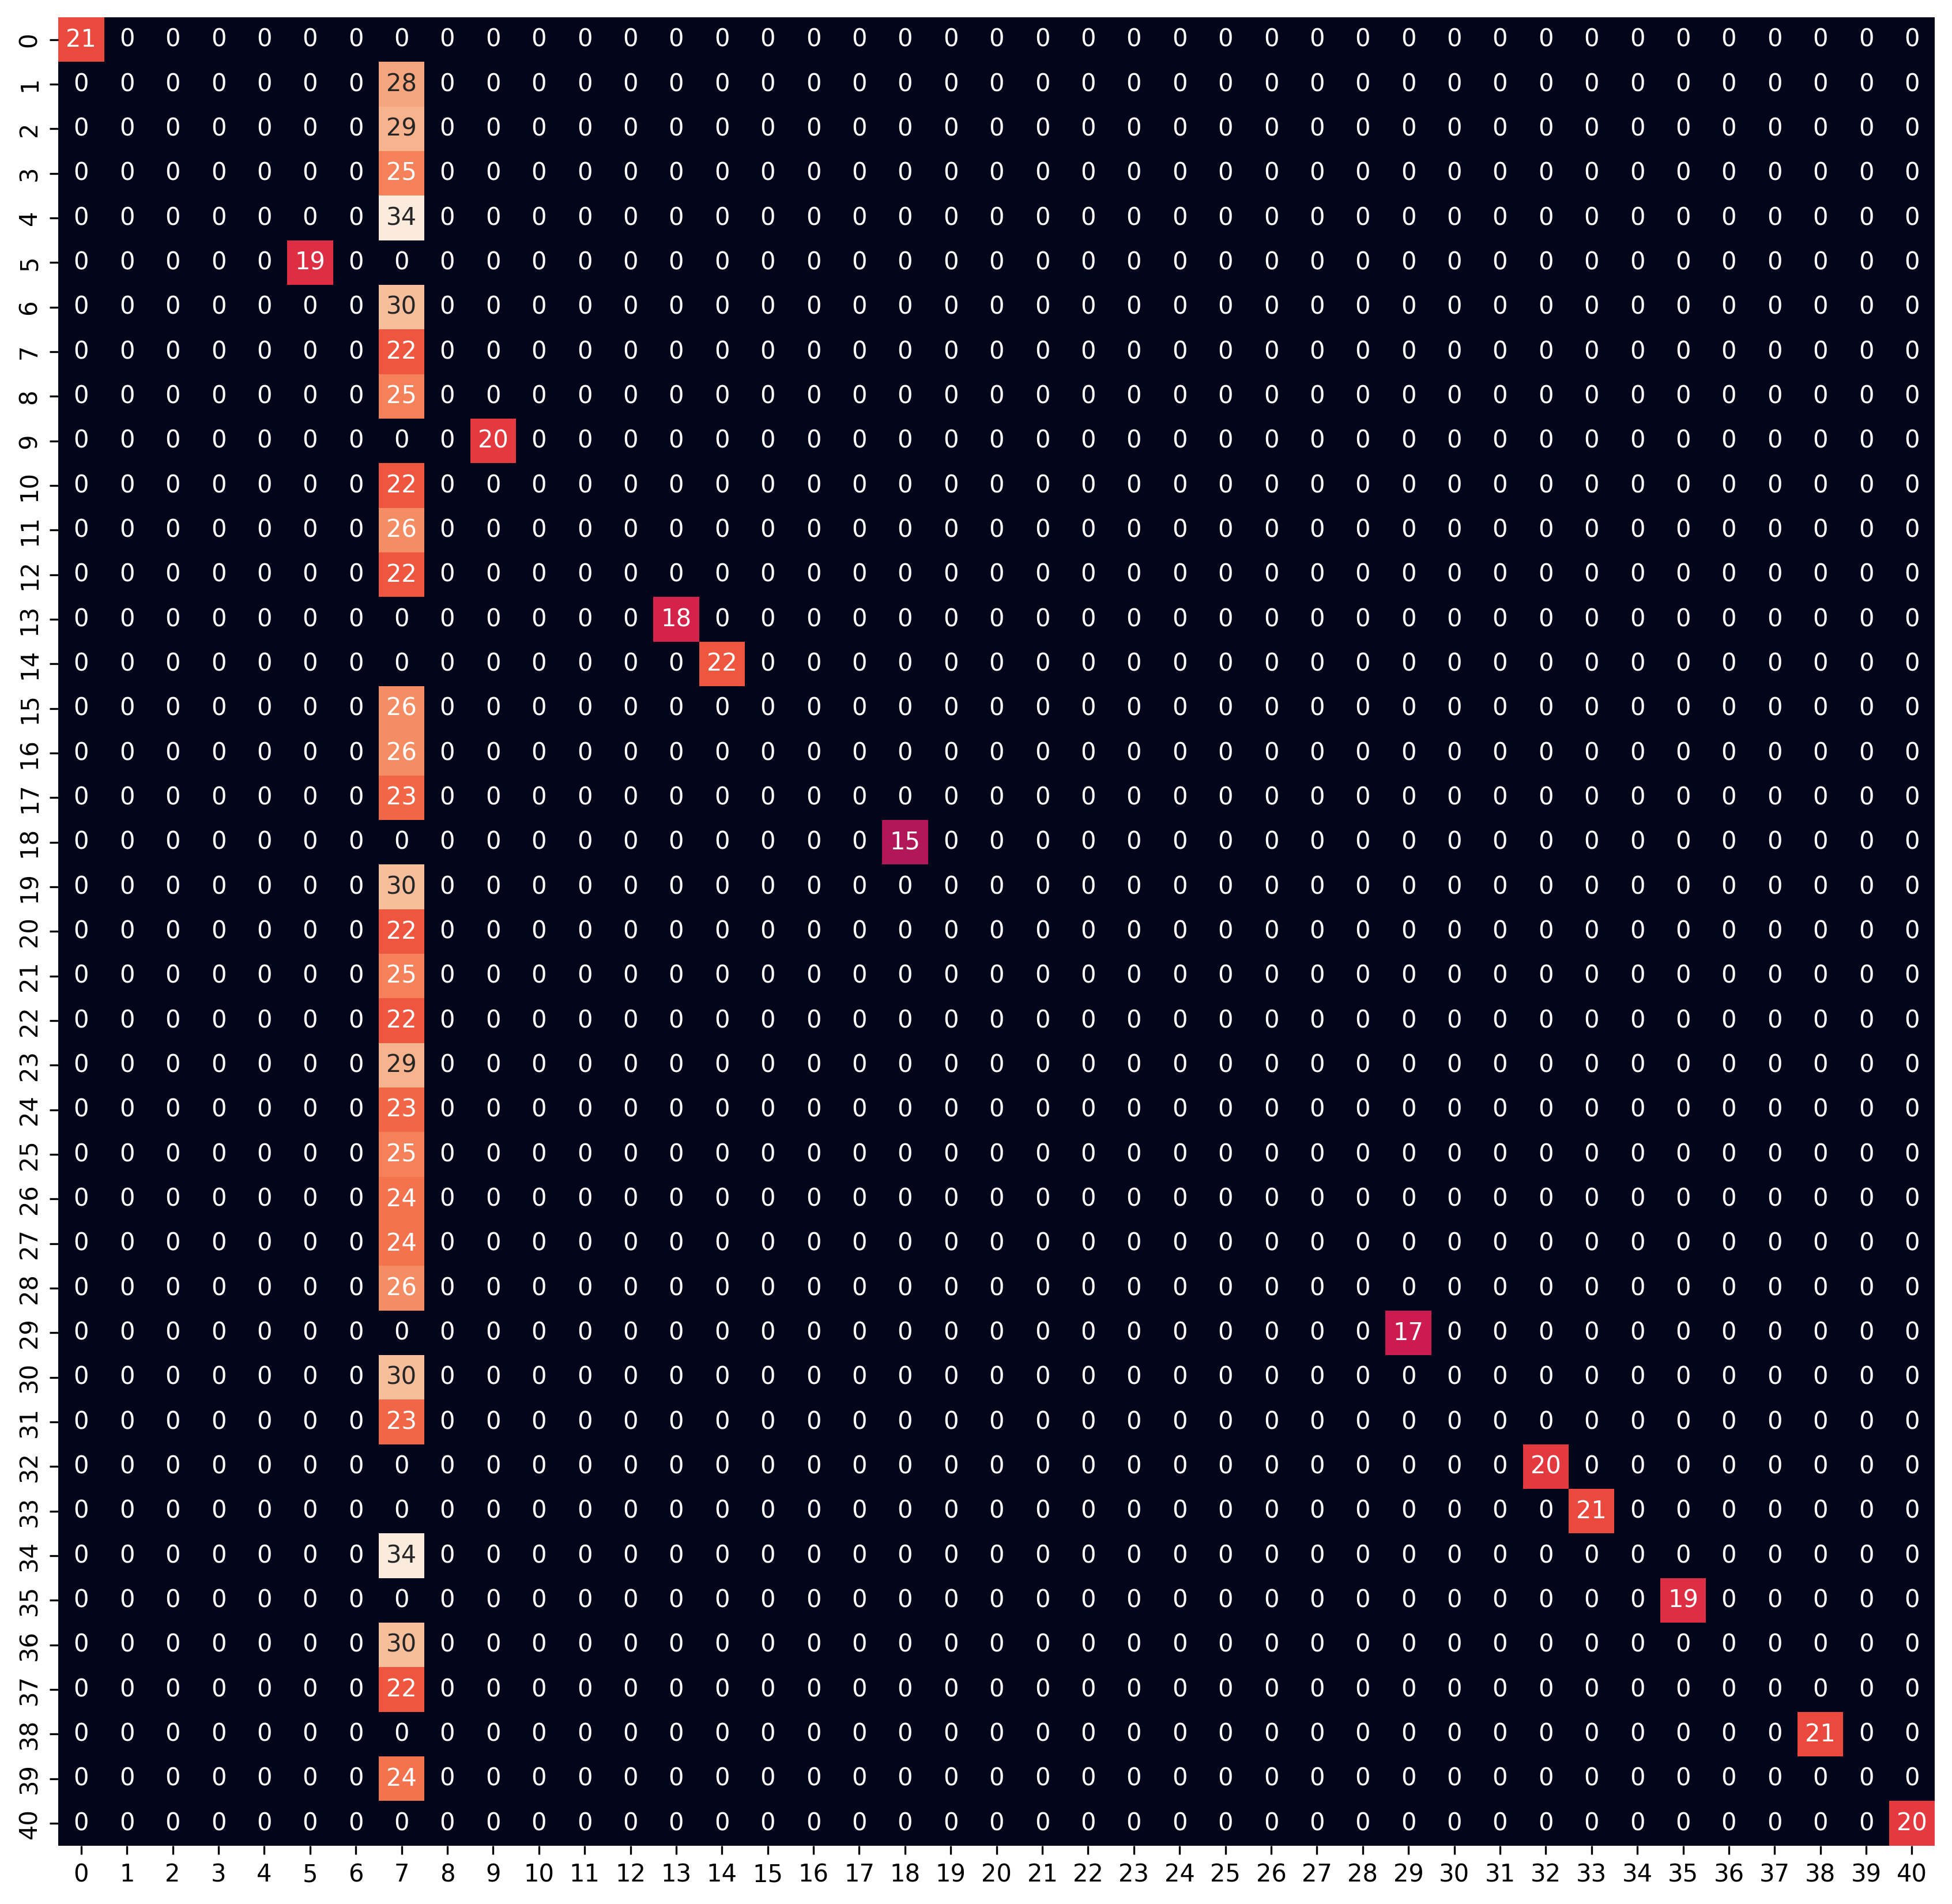

In [31]:
plt.figure(figsize=[14,14], dpi=300)
sns.heatmap(treeconfmat, annot = True, cbar = False)
plt.show()

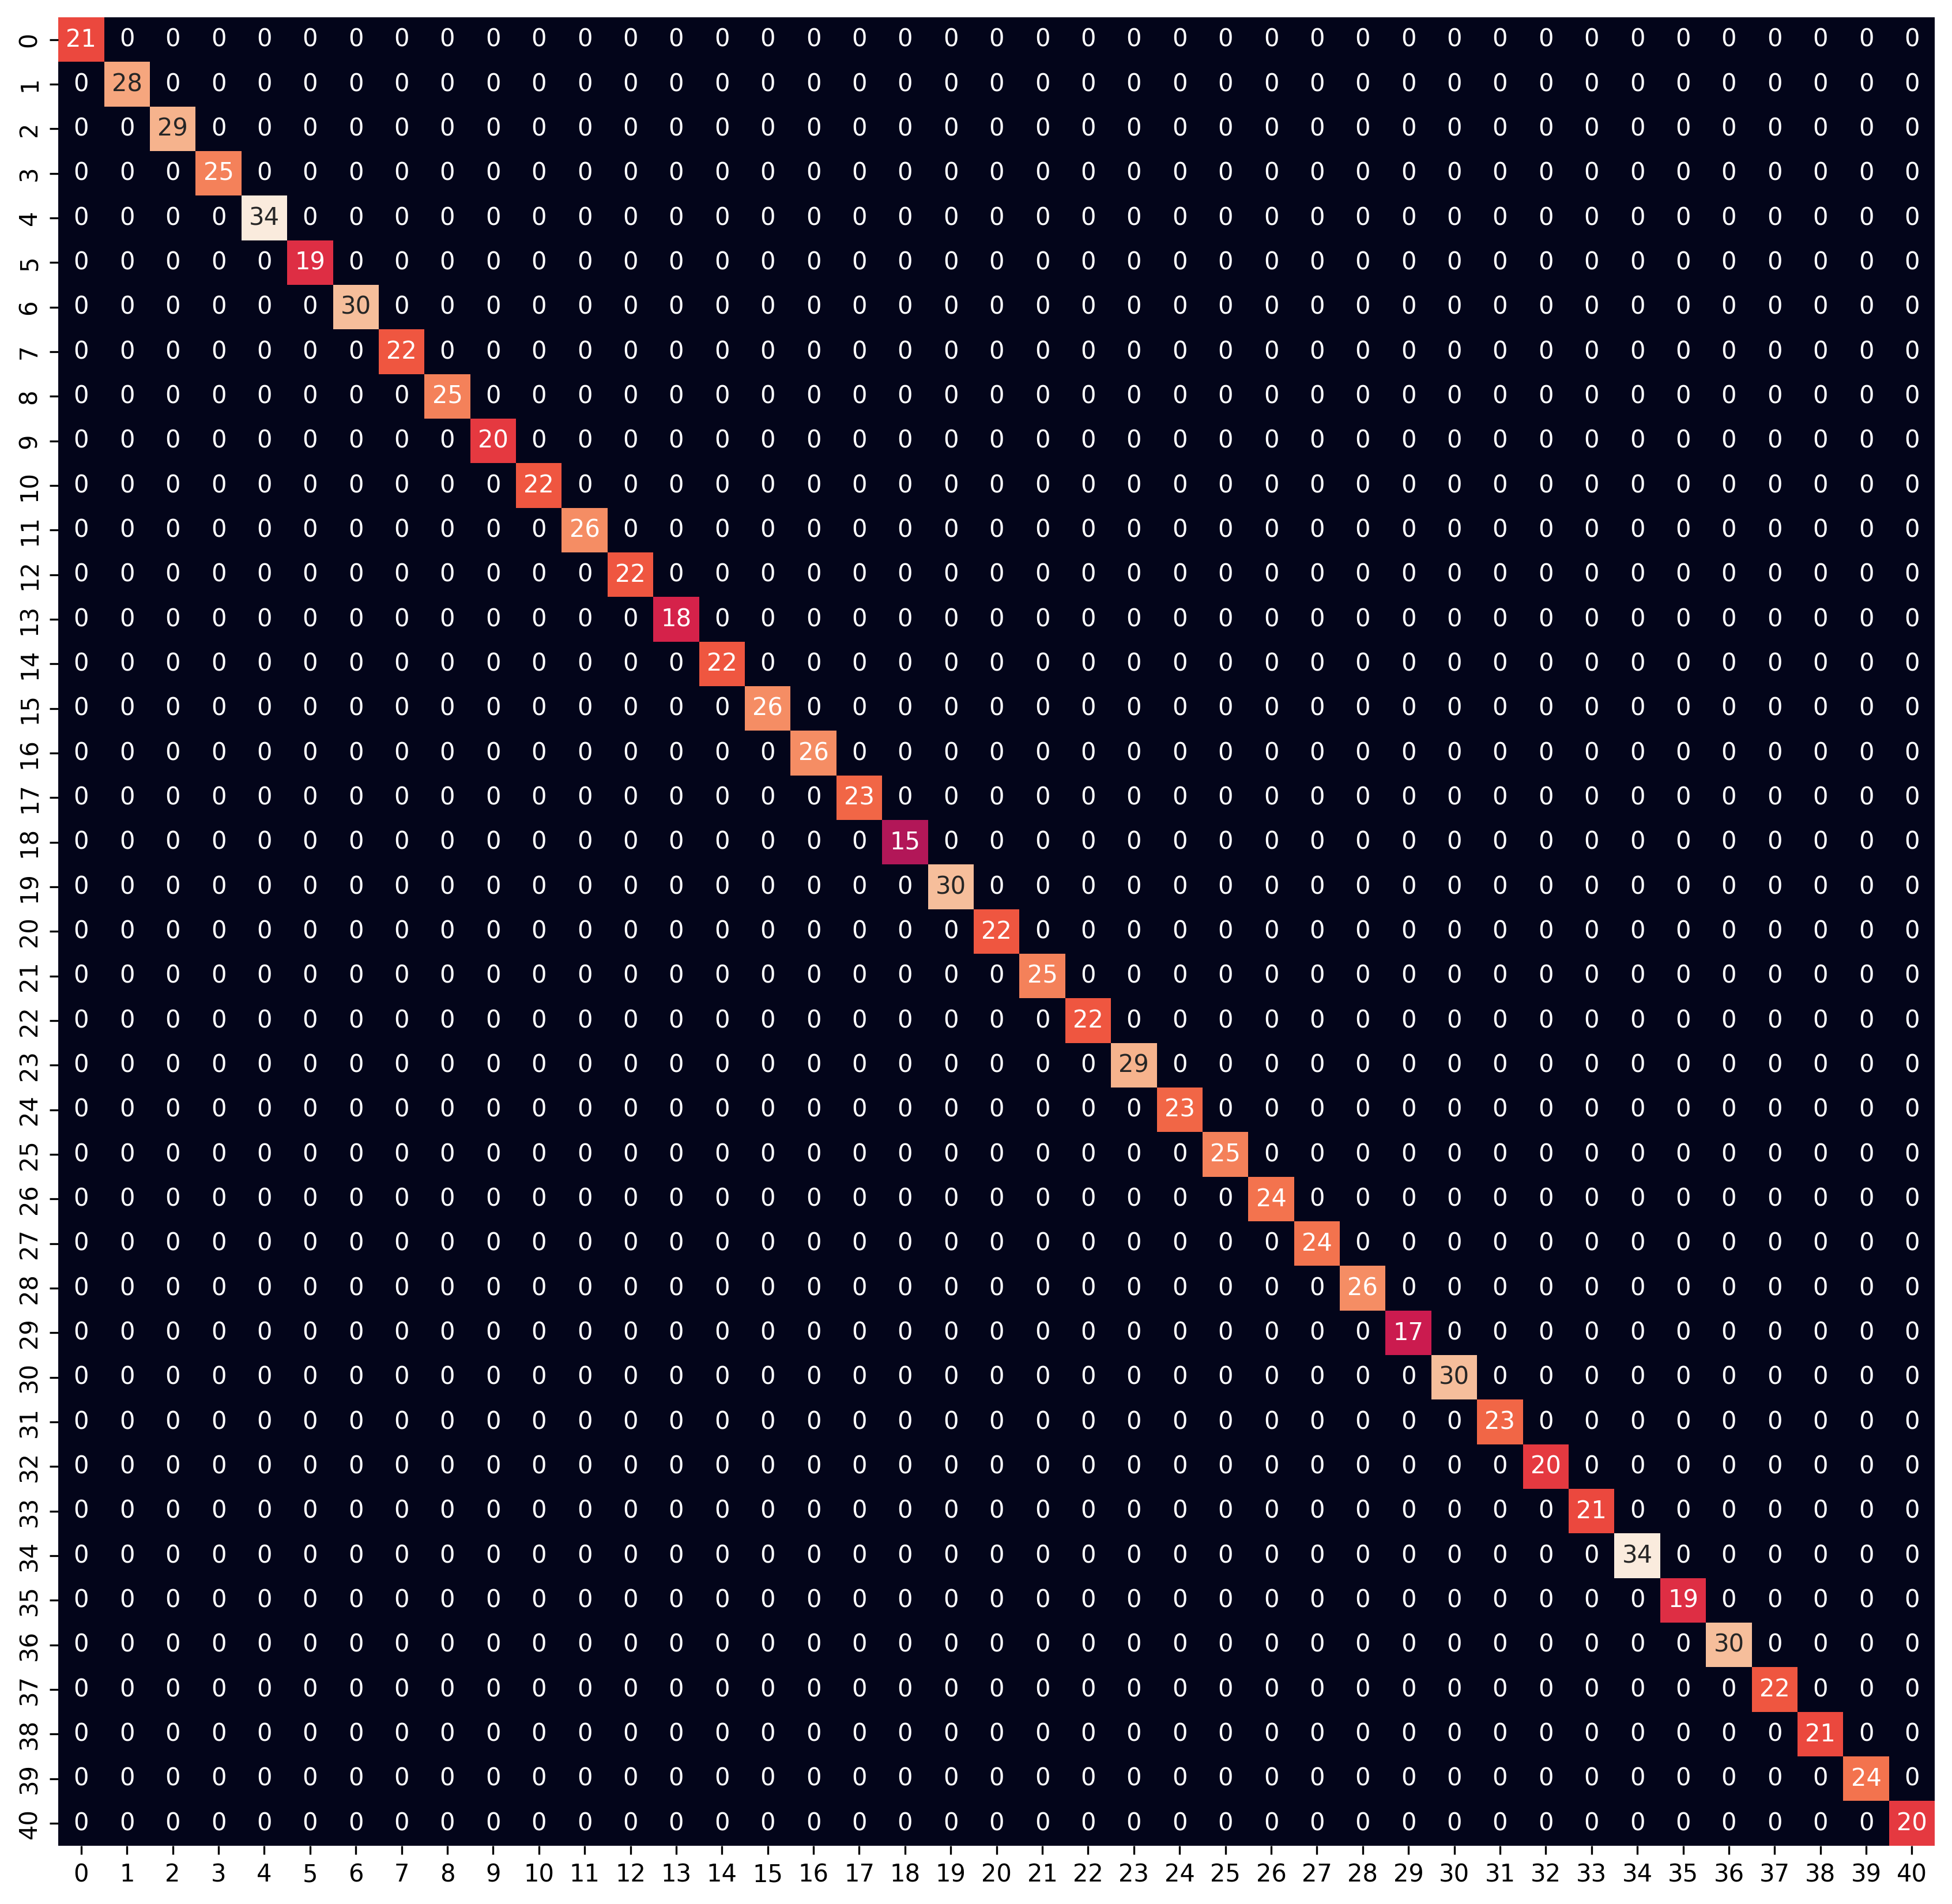

In [32]:
plt.figure(figsize=[14,14], dpi=300)
sns.heatmap(confmat, annot = True, cbar = False)
plt.savefig('confution metrics.png')
plt.show()

In [33]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(forest,f)

In [34]:
# load
with open('../models/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [35]:
model.predict(x_test)

array(['Migraine', 'Osteoarthristis', 'Impetigo', 'Diabetes ',
       'Varicose veins', 'Osteoarthristis', 'Jaundice', 'GERD',
       'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Dengue',
       'Hypothyroidism', 'Urinary tract infection', 'Drug Reaction',
       'Acne', 'Tuberculosis', 'Alcoholic hepatitis', 'Hypoglycemia',
       'Hepatitis D', 'Drug Reaction', 'Hepatitis B', 'Common Cold',
       'Diabetes ', 'Jaundice', 'Peptic ulcer diseae',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis', 'Hypertension ',
       'Impetigo', 'Hepatitis B', 'Hepatitis B', 'Hepatitis C',
       'Impetigo', 'Alcoholic hepatitis', 'Peptic ulcer diseae',
       'Bronchial Asthma', 'Jaundice', 'Pneumonia', 'Hepatitis B',
       'Diabetes ', 'Osteoarthristis', 'Dimorphic hemmorhoids(piles)',
       'Chronic cholestasis', 'Allergy', 'Malaria',
       'Cervical spondylosis', 'Gastroenteritis', 'Hypertension ',
       'Osteoarthristis', 'Malaria', 'Typhoid', 'AIDS',
       'Fungal infection', 'Alc

In [36]:
x_test.iloc[376]

itching                                    0.0
skin_rash                                  0.0
continuous_sneezing                        1.0
shivering                                  0.0
stomach_pain                               0.0
                                          ... 
(vertigo) Paroymsal  Positional Vertigo    0.0
Acne                                       0.0
Urinary tract infection                    0.0
Psoriasis                                  0.0
Impetigo                                   0.0
Name: 675, Length: 173, dtype: float64

In [37]:
p1 = [1,1,1,1,1,1,1,1,1,1,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0
      ]
model.predict(np.array(p1).reshape(1,-1))

C:\Users\Amila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['GERD'], dtype=object)

In [38]:
p2 = [0,1,1,1,0,0,1,0,1,1,
      0,1,0,0,0,0,0,0,0,0,
      0,0,0,0,1,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0
      ]
model.predict(np.array(p2).reshape(1,-1))

C:\Users\Amila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Allergy'], dtype=object)

In [39]:
p3 = [0,1,1,1,0,0,1,0,1,1,
      0,1,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0
      ]
model.predict(np.array(p3).reshape(1,-1))

C:\Users\Amila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Allergy'], dtype=object)

In [40]:
p4 = [0,0,1,0,0,0,1,0,1,1,
      0,1,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,1,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,1,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,1,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0
      ]
model.predict(np.array(p4).reshape(1,-1))

C:\Users\Amila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Bronchial Asthma'], dtype=object)

In [50]:
p5 = [1,1,1,0,1,0,1,1,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0
      ]
model.predict(np.array(p5).reshape(1,-1))

C:\Users\Amila\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Drug Reaction'], dtype=object)